In [14]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import scipy.io
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import streamlit as st

In [15]:
dataset_folder = '/IITR/Dataset/CWRU/'

file_list = os.listdir(dataset_folder)

# Initializing empty dictionaries
de_data = {}
fe_data = {}
ba_data = {}
rpm_data = {}

for file_name in file_list:
    if file_name.endswith('.mat'):
        file_path = os.path.join(dataset_folder, file_name)
        CWRU_data = scipy.io.loadmat(file_path)

        for key in CWRU_data.keys():
            if key.endswith('_DE_time'):
                de_data[file_name] = CWRU_data[key]
            elif key.endswith('_FE_time'):
                fe_data[file_name] = CWRU_data[key]
            elif key.endswith('_BA_time'):
                ba_data[file_name] = CWRU_data[key]
            elif key.endswith('RPM'):
                rpm_data[file_name] = CWRU_data[key][0, 0]  # Since RPM is a single value

Note: <p>Drive End (DE)</p><p> Fan End (DE)</p><p> Base plate acceleration (BA)</p><p> RPM</p>


In [16]:
for file_name in de_data.keys():
    print(f"File: {file_name}")
    
    # DE_data
    if file_name in de_data:
        print(f"DE data:")
        print(de_data[file_name])
    else:
        print(f"No DE data found for {file_name}")

    # FE_data
    if file_name in fe_data:
        print(f"FE data:")
        print(fe_data[file_name])
    else:
        print(f"No FE data found for {file_name}")

    # BA_data
    if file_name in ba_data:
        print(f"BA data:")
        print(ba_data[file_name])
    else:
        print(f"No BA data found for {file_name}")

    # RPM_data
    if file_name in rpm_data:
        print(f"RPM value:")
        print(rpm_data[file_name])
    else:
        print(f"No RPM value found for {file_name}")

    print("\n" + "-"*50 + "\n") 


File: B007 0.mat
DE data:
[[-0.0027614 ]
 [-0.09632403]
 [ 0.11370459]
 ...
 [-0.07829373]
 [-0.14911545]
 [ 0.02111657]]
FE data:
[[-0.24716182]
 [ 0.14279091]
 [ 0.00328727]
 ...
 [ 0.01643636]
 [-0.03842   ]
 [-0.16806182]]
BA data:
[[ 0.01553163]
 [ 0.01693994]
 [-0.03645507]
 ...
 [ 0.03178754]
 [-0.03243134]
 [-0.0668343 ]]
RPM value:
1796

--------------------------------------------------

File: B007 1.mat
DE data:
[[-0.0721212 ]
 [ 0.30310395]
 [ 0.03313677]
 ...
 [ 0.08820228]
 [-0.19687138]
 [-0.03898443]]
FE data:
[[ 0.07745636]
 [ 0.04561091]
 [-0.01109455]
 ...
 [-0.01273818]
 [ 0.04170727]
 [ 0.02753091]]
BA data:
[[0.07327228]
 [0.06932902]
 [0.05480332]
 ...
 [0.05753947]
 [0.01569258]
 [0.01488783]]
RPM value:
1772

--------------------------------------------------

File: B007 2.mat
DE data:
[[-0.31447441]
 [ 0.12198878]
 [ 0.39146866]
 ...
 [ 0.01900491]
 [ 0.21067836]
 [ 0.0568523 ]]
FE data:
[[ 0.14792727]
 [-0.04499455]
 [ 0.10806909]
 ...
 [-0.02177818]
 [-0.085

Importing the data


In [17]:
selected_file = 'B007 0.mat'

de_time_data = de_data[selected_file]
fe_time_data = fe_data[selected_file]
ba_time_data = ba_data[selected_file]
rpm_value = rpm_data[selected_file]

print(f"DE Time Data Shape for {selected_file}: {de_time_data.shape}")
print(f"FE Time Data Shape for {selected_file}: {fe_time_data.shape}")
print(f"BA Time Data Shape for {selected_file}: {ba_time_data.shape}")
print(f"RPM Value for {selected_file}: {rpm_value}")

DE Time Data Shape for B007 0.mat: (122571, 1)
FE Time Data Shape for B007 0.mat: (122571, 1)
BA Time Data Shape for B007 0.mat: (122571, 1)
RPM Value for B007 0.mat: 1796


Converting RPM to hz


In [18]:
speed_motor = rpm_value / 60  # Convert RPM to Hertz

print(f'RPM value in {selected_file}: {rpm_value}')
print(f"Speed of the Motor: {speed_motor:.2f} Hz")

RPM value in B007 0.mat: 1796
Speed of the Motor: 29.93 Hz


PLotting the data against time while scaling along sampling rate


In [19]:
sampling_rate = 12000  # 12 kHz
duration = 10 

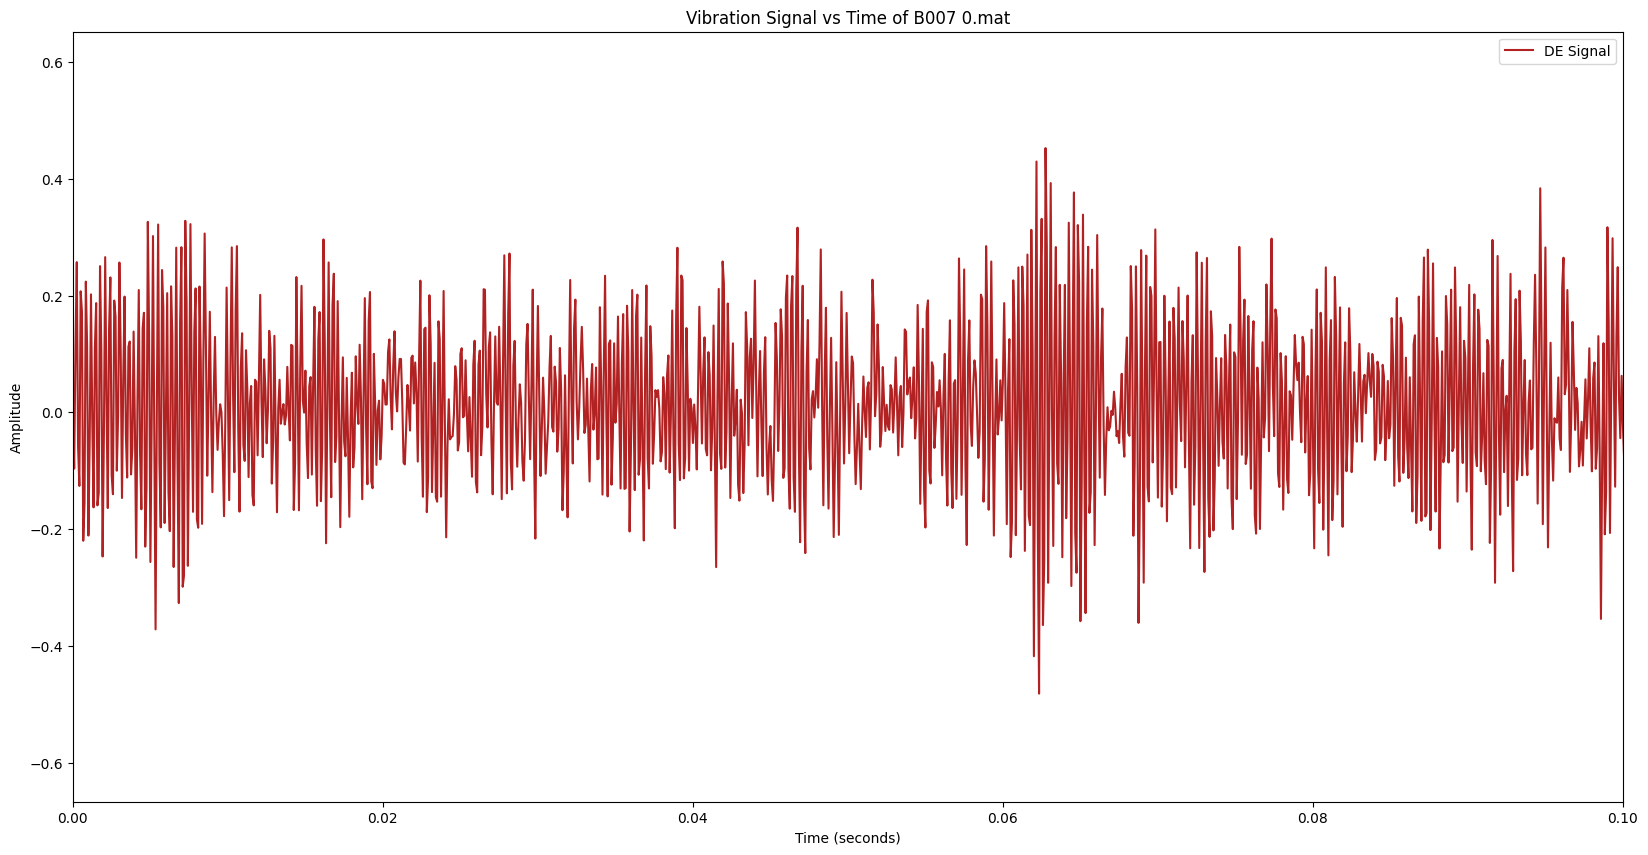

In [20]:
time = np.arange(0, duration, 1/sampling_rate)
de_time_data_signal = de_time_data[:len(time)]
fe_time_data_signal = fe_time_data[:len(time)]
ba_time_data_signal = ba_time_data[:len(time)]

plt.figure(figsize=(20,10))
plt.plot(time, de_time_data_signal, color='firebrick', label='DE Signal')
# plt.plot(time, fe_time_data_signal, color='steelblue', label='FE Signal')
# plt.plot(time, ba_time_data_signal, color='goldenrod', label='BA Signal')
plt.xlim(0, 0.1)
plt.title(f'Vibration Signal vs Time of {selected_file}')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

Normalising the data in the range -1 to +1


In [26]:
def normalize_data(data):
    scaler = MinMaxScaler(feature_range=(-1,1))
    normalized_data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
    return normalized_data

normalized_data=normalize_data(de_time_data_signal)
print(f'Normalised Data of {selected_file}: {normalized_data}')

Normalised Data of B007 0.mat: [ 0.00785695 -0.14819832  0.20211325 ...  0.68328366  0.30073151
 -0.19398537]


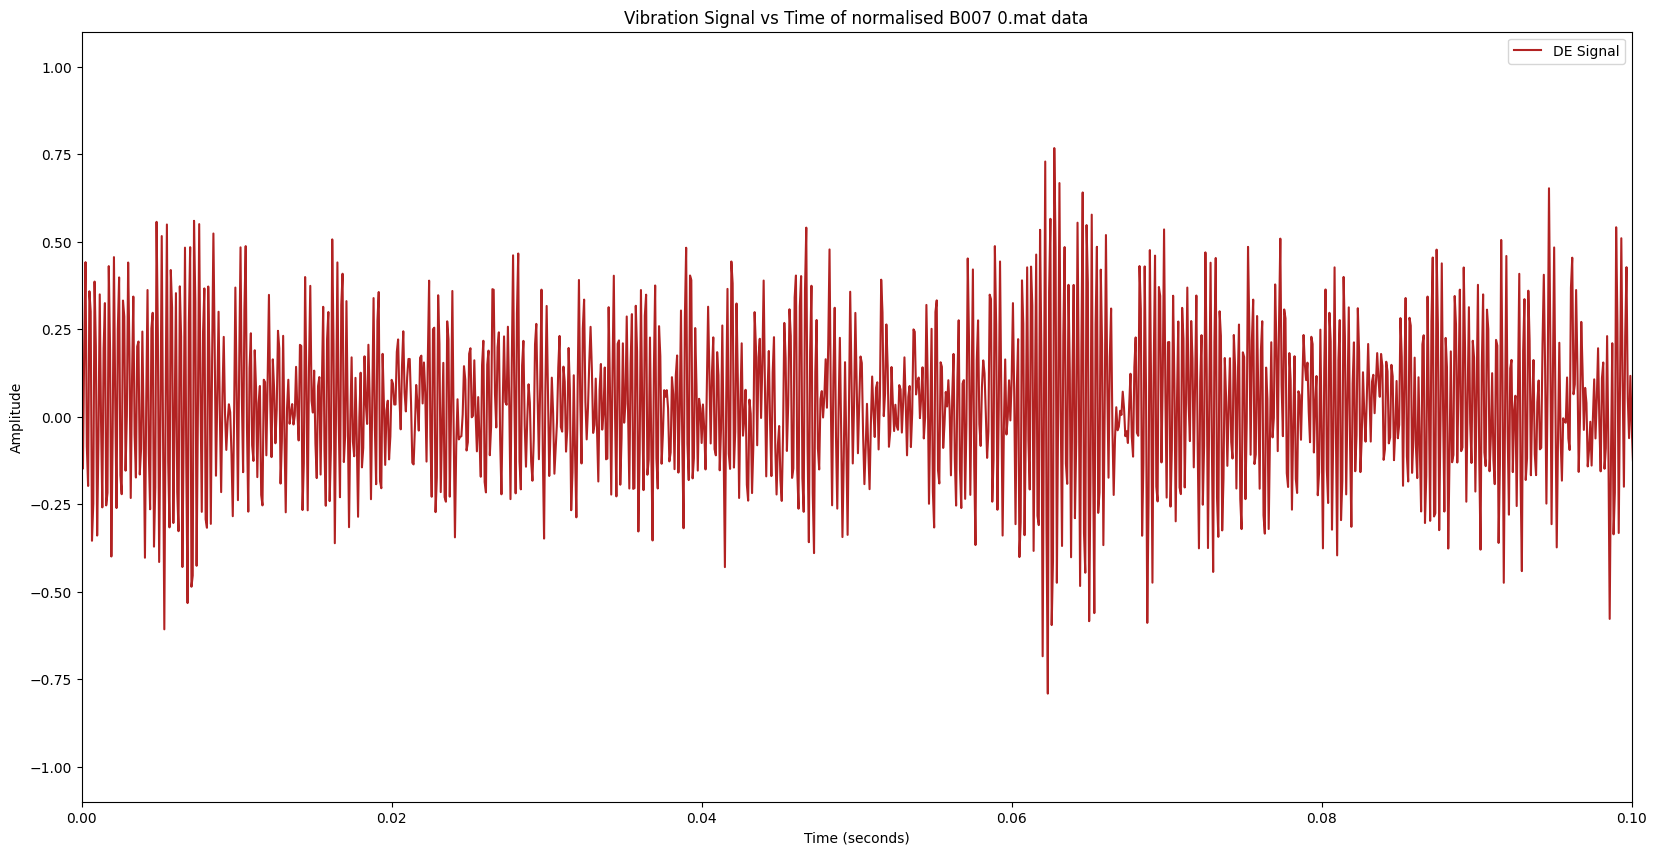

In [27]:
plt.figure(figsize=(20,10))
plt.plot(time, normalized_data, color='firebrick', label='DE Signal')
plt.xlim(0, 0.1)
plt.title(f'Vibration Signal vs Time of normalised {selected_file} data')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [46]:
fft_result = np.fft.fft(normalized_data)
freq = np.fft.fftfreq(len(normalized_data), d=1/sampling_rate)
positive_freq_mask = freq > 0

fig = go.Figure()
fig.add_trace(go.Scatter(x=freq[positive_freq_mask], y=np.abs(fft_result[positive_freq_mask]),
                         mode='lines',line=dict(color='red'),
                         text=[f'Amplitude={amp:.3f}<br><br>Frequency={freq:.3f} Hz' for amp, freq in zip(np.abs(fft_result[positive_freq_mask]), freq[positive_freq_mask])],
                         hoverinfo='text'))
fig.update_layout(height=800, width=2000)
fig.update_xaxes(title_text='Frequency (Hz)')
fig.update_yaxes(title_text='Amplitude')
fig.show()